# power in AC circuit
**Author: Amirhossein Abolfazli Esfahani**


## Understanding Electrical Power in DC and AC Circuits
In a DC circuit, the power consumed is simply the product of the DC voltage times the DC current, given in watts. However, for AC circuits with reactive components we have to calculate the consumed power differently.

Electrical power is the “rate” at which energy is being consumed in a circuit and as such all electrical and electronic components and devices have a limit to the amount of electrical power that they can safely handle. For example, a 1/4 watt resistor or a 20 watt amplifier.

Electrical power can be time-varying either as a DC quantity or as an AC quantity. The amount of power in a circuit at any instant of time is called the instantaneous power and is given by the well-known relationship of power equals volts times amps (P = V*I). So one watt (which is the rate of expending energy at one joule per second) will be equal to the volt-ampere product of one volt times one ampere.

Then the power absorbed or supplied by a circuit element is the product of the voltage, V across the element, and the current, I flowing through it. So if we had a DC circuit with a resistance of “R” ohms, the power dissipated by the resistor in watts is given by any of the following generalised formulas:

$P = V \times I = \frac{V^2}{R} = I^2 \times R \; \text{(watts)}$ 

Where: V is the dc voltage, I is the dc current and R is the value of the resistance.

So power within an electrical circuit is only present when both the voltage and current are present, that is no open-circuit or closed-circuit conditions. Consider the following simple example of a standard resistive dc circuit:

### DC Resistive Circuit
$P = V \times I = 12 \times 2 = 24W$

$P = \frac{V^2}{R} = \frac{12^2}{6} = 24W$

$P = I^2 \times R = 2^2 \times 6 = 24W$


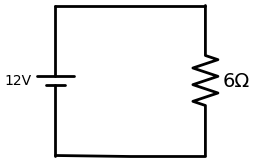

In [5]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.BatteryCell().up().reverse().label("12V",fontsize=10)
    d += elm.Line().right()
    d += elm.Resistor().down().label("6Ω",loc="bot")
    d += elm.Line().left()

## Electrical Power in an AC Circuit
In a DC circuit, the voltages and currents are generally constant, that is not varying with time as there is no sinusoidal waveform associated with the supply. However for power in AC circuits, the instantaneous values of the voltage, current and therefore power are constantly changing being influenced by the supply. So we can not calculate the power in AC circuits in the same manner as we can in DC circuits, but we can still say that power (p) is equal to the voltage (v) times the amperes (i).

Another important point is that AC circuits contain reactance, so there is a power component as a result of the magnetic and/or electric fields created by the components. The result is that unlike a purely resistive component, this power is stored and then returned back to the supply as the sinusoidal waveform goes through one complete periodic cycle.

Thus, the average power absorbed by a circuit is the sum of the power stored and the power returned over one complete cycle. So a circuits average power consumption will be the average of the instantaneous power over one full cycle with the instantaneous power, p defined as the multiplication of the instantaneous voltage, v by the instantaneous current, i. Note that as the sine function is periodic and continuous, the average power given over all time will be exactly the same as the average power given over a single cycle.

Let us assume that the waveforms of the voltage and current are both sinusoidal, so we recall that:




$e_1 = V_m \sin(0^\circ) = V_m \times 0 = 0v$


$e_1 = V_m \sin(0^\circ) = V_m \times 0 = 0v$



$e_1 = V_m \sin(180^\circ) = V_m \times 0 = 0v$

$e_1 = V_m \sin(360^\circ) = V_m \times 0 = 0v$


$e_2 = V_m \sin(90^\circ) = V_m \times +1 = +V_m = 1$


$e_3 = V_m \sin(270^\circ) = V_m \times -1 = -V_m = -1$






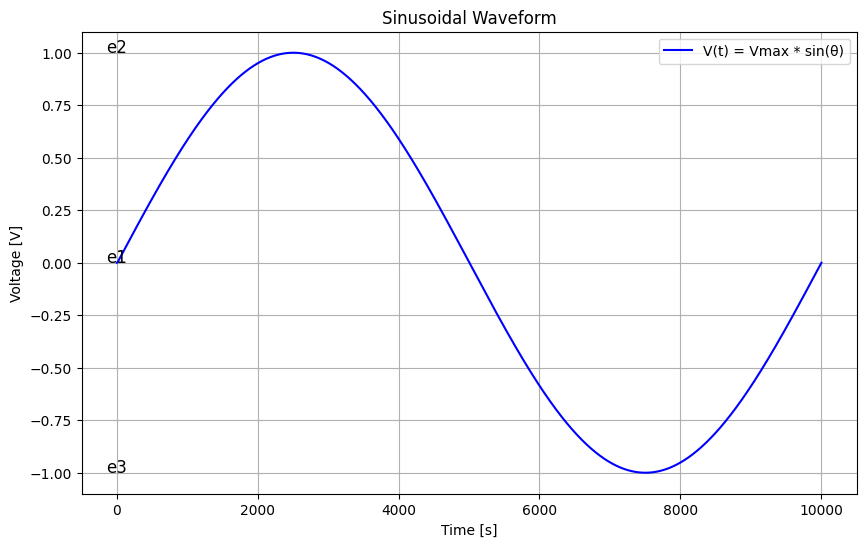

In [6]:
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import matplotlib.pyplot as plt


circuit = Circuit('Sinusoidal Waveform')


circuit.SinusoidalVoltageSource('input', 'n1', circuit.gnd, amplitude=1@u_V, frequency=1@u_Hz, offset=0@u_V)


simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.1@u_ms, end_time=1@u_s)


plt.figure(figsize=(10, 6))
plt.plot(analysis['n1'], color='b', label='V(t) = Vmax * sin(θ)')
plt.text(0, 1, 'e2', fontsize=12, ha='center')
plt.text(0, 0, 'e1', fontsize=12, ha='center')
plt.text(1, -1, 'e3', fontsize=12, ha='center')
plt.title('Sinusoidal Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend()
plt.show()


## Equations in AC power circuit

$$ P = V * I $$

where:

$$V = V_m sin(\omega t + \theta_v)$$
$$I = I_m sin(\omega t + \theta_i)$$
$$P = [V_m sin(\omega t + \theta_v)] * [I_m sin(\omega t + \theta_i)]$$
$$P = V_m  I_m[sin(\omega t + \theta_v) * sin(\omega t + \theta_i)]$$

Applying the trigonometric product-to-sum identity of:

$$sinA sinB = \frac{1}{2}[cos(A - B) - cos(A + B)]$$

and $θ = θ_v – θ_i$ (the phase difference between the voltage and the current waveforms) into the above equation gives:
$$P = \frac{V_m I_m}{2}[cos(\theta) - cos(2\omega t + \theta)]$$
$$\frac{V_m I_m}{2} = \frac{V_m}{\sqrt{2}} * \frac{I_m}{\sqrt{2}} = V_{rms} * I_{rms}$$

Where V and I are the root-mean-squared (rms) values of the sinusoidal waveforms, v  and i respectively, and θ is the phase difference between the two waveforms. Therefore we can express the instantaneous power in AC circuits as being:

### Instantaneous Equations
$$P = VIcos(\theta) - VIcos(2\omega t + \theta)$$

This equation shows us that the instantaneous power in AC circuits has two different parts and is therefore the sum of these two terms. The second term is a time varying sinusoid whose frequency is equal to twice the angular frequency of the supply due to the 2ω part of the term. The first term however is a constant whose value depends only on the phase difference, θ between the voltage, (V) and the current, (I).

As the instantaneous power in AC cicruits is constantly changing with the profile of the sinusoid over time, this makes it difficult to measure. It is therefore more convenient, and easier on the maths to use the average or mean value of the power. So over a fixed number of cycles, the average value of the instantaneous power of the sinusoid is given simply as:

$$P = VIcos(\theta)$$
Where V and I are the sinusoids rms values, and θ (Theta) is the phase angle between the voltage and the current. The units of power are in watts (W).

### Example


The voltage and current values of a 50Hz sinusoidal supply are given as:
$V_t = 240sin(\omega t + 60)$ volts and $I_t = 5sin(\omega t - 10)$ Amps respectively. Find the values of the instantaneous power and the average power absorbed by the circuit.
From above, the instantaneous power absorbed by the circuit is given as:
$$ P = V * I = 240sin(\omega t + 60) * 5sin(\omega t - 10)$$
$$ P = 240 * 5 [sin(314.2t + 60) * sin(314.2t - 10)]$$

Applying the trigonometric identity rule from above gives:
$$ sinA sinB = \frac{1}{2}[cos(A - B) - cos(A + B)]$$

then:
$$P = \frac{V_m I_m}{2}[cos(\theta) - cos(2\omega t + \theta)] $$
$$P = \frac{240 * 5}{2}[cos(60 - (-10)) - cos(2 * 314.2 + 60 + (-10))] $$
$$ P_t = 205.2 - 600[cos(628.4t + 50)]Watts $$
The average power is then calculated as:
$$ P_{avg} = \frac{V_m I_m}{2}cos(\theta_v - \theta_i) $$
$$ P_{avg} = \frac{240 * 5}{2}cos(60 - (-10)) = 205.2Watts $$

## A Purely Resistive Circuit
![RC1_charging](./photoes/image2.png)

We have seen thus far, that in a dc circuit, power is equal to the product of voltage and current and this relationship is also true for a purely resistive AC circuit. Resistors are electrical devices that consume energy and the power in a resistor is given by $ P = VI = I ^ 2 R = \frac{V ^ 2}{R}$. This power is always positive.

When a pure resistor is connected to a sinusoidal voltage supply, the current flowing through the resistor will vary in proportion to the supply voltage, that is the voltage and current waveforms are “in-phase” with each other. Since the phase difference between the voltage waveform and the current waveform is 0o, the phase angle resulting in cos 0o will be equal to 1.

Then the electrical power consumed by the resistor is given by:

### Electrical Power in a Pure Resistor
$$ P = V * Icos(\theta)$$
$$cos(\theta) = 1$$
$$P = V * I * 1 = V * I Watts$$

As the voltage and current waveforms are in-phase, that is both waveforms reach their peak values at the same time, and also pass through zero at the same time, the power equation above reduces down to just: V*I. Therefore the the power at any instant can be found by multiplying together the two waveforms to give the volt-ampere product. This is called the “Real Power”, (P) measured in watts, (W), Kilowatt (kW), Megawatt (MW), etc.

## AC Purely Inductive Circuit
In a purely inductive (that is infinite capacitance, C = ∞ and zero resistance, R = 0) circuit of L Henries, the voltage and current waveforms are not in-phase. Whenever a changing voltage is applied to a purely inductive coil, a “back” emf is produced by the coil due to its self-inductance. This self-inductance opposes and limits any changes to the current flowing in the coil.

The effects of this back emf is that the current cannot increase immediately through the coil in-phase with the applied voltage causing the current waveform to reach its peak or maximum value some time after that of the voltage. The result is that in a purely inductive circuit, the current always “lags” (ELI) behind the voltage by 90o (π/2) as shown.


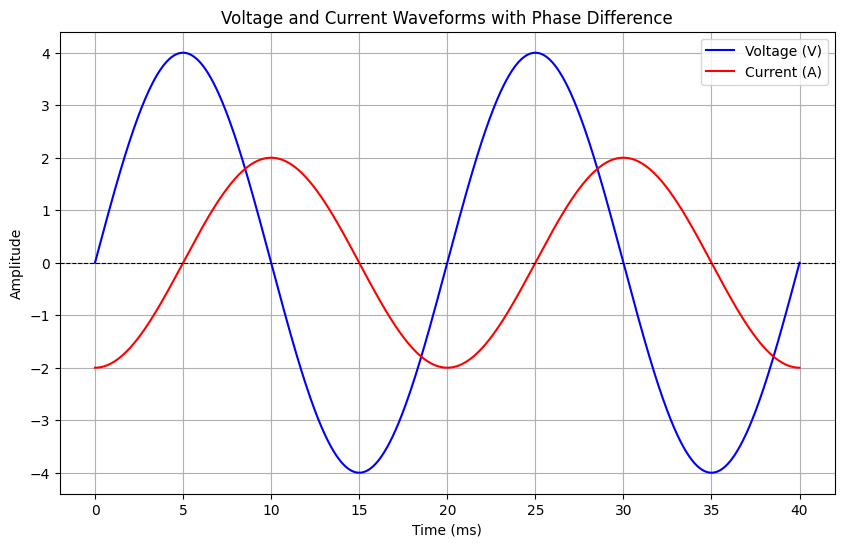

In [7]:
import PySpice 
import numpy as np
import matplotlib.pyplot as plt

Vm = 4
Im = 2 
f = 50 
omega = 2 * np.pi * f 
phi = np.pi / 4 

time = np.linspace(0, 0.04, 1000)


voltage = Vm * np.sin(omega * time)
current = -(Im * np.cos(omega * time ))


plt.figure(figsize=(10, 6))
plt.plot(time * 1e3, voltage, label='Voltage (V)', color='blue')
plt.plot(time * 1e3, current, label='Current (A)', color='red')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Voltage and Current Waveforms with Phase Difference')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


### Chart Explanation
The waveforms above shows us the instantaneous voltage and instantaneous current across a purely inductive coil as a function of time. Maximum current, Imax occurs at one full quarter of a cycle $(90\degree)$ after the maximum (peak) value of the voltage. Here the current is shown with its negative maximum value at the start of the voltage cycle and passes through zero increasing to its positive maximum value when the voltage waveform is at its maximum value at $90\degree$.

Thus as the voltage and current waveforms are no longer rising and falling together, but instead a phase shift of $90\degree$ (π/2) is introduced in the coil, then the voltage and current waveforms are “out-of-phase” with each other as the voltage leads the current by $90\degree$. Since the phase difference between the voltage waveform and the current waveform is 90o, then the phase angle resulting in $cos(90\degree) = 0$.

Therefore the electrical power stored by a pure inductor, $Q_L$ is given by:
### Real Power in a Pure Inductor
$$ P = V * I $$
$$ cos(90\degree)$$
$$ P = V * I * cos(0\degree) = 0$$

Clearly then, a pure inductor does not consume or dissipate any real or true power, but as we have both voltage and current the use of cos(θ) in the expression: P = V*I*cos(θ) for a pure inductor is no longer valid. The product of the current and the voltage in this case is imaginary power, commonly called “Reactive Power”, (Q) measured in volt-amperes reactive, (VAr), Kilo-voltamperes reactive (KVAr), etc.

Voltamperes reactive, VAr should not be confused with watts, (W) which is used for real power. VAr represents the product of the volts and amperes that are 90o out-of-phase with each other. To identify the reactive average power mathematically, the sine function is used. Then the equation for the average reactive power in an inductor becomes:

### Reactive Power in a Pure Inductor
$$Q_L = V * Isin(\theta)$$
$$sin(90\degree)$$
$$Q_L = V * I * sin(90\degree) = V * I$$


## A Purely Capacitive Circuit
A purely capacitive (that is zero inductance, L = 0 and infinite resistance, R = ∞) circuit of C Farads, has the property of delaying changes in the voltage across it. Capacitors store electrical energy in the form of an electric field within the dielectric so a pure capacitor does not dissipate any energy but instead stores it.

In a purely capacitive circuit the voltage cannot increase in-phase with the current as it needs to “charge-up” the capacitors plates first. This causes the voltage waveform to reach its peak or maximum value some time after that of the current. The result is that in a purely capacitive circuit, the current always “leads” (ICE) the voltage by 90o (ω/2) as shown.

![RC1_charging](./photoes/image1.png)

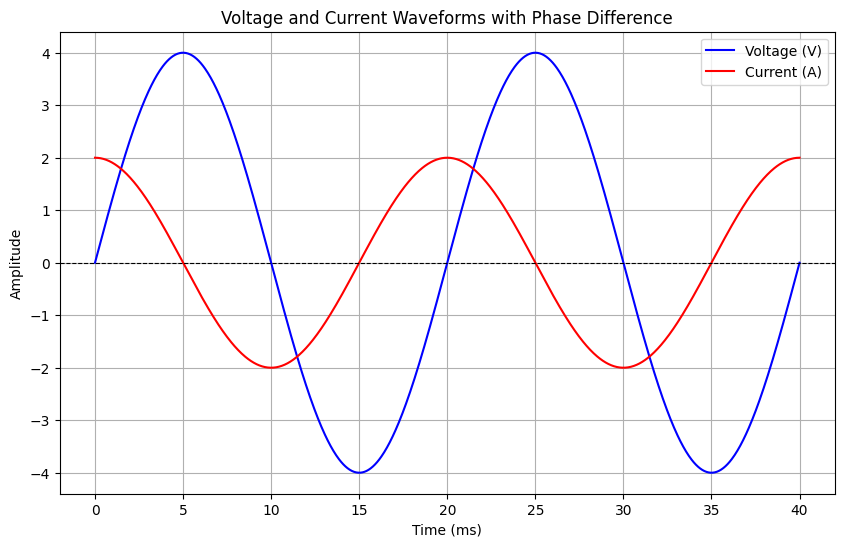

In [8]:
import PySpice 
import numpy as np
import matplotlib.pyplot as plt

Vm = 4
Im = 2 
f = 50 
omega = 2 * np.pi * f 
phi = np.pi / 4 

time = np.linspace(0, 0.04, 1000)


voltage = Vm * np.sin(omega * time)
current = Im * np.cos(omega * time )


plt.figure(figsize=(10, 6))
plt.plot(time * 1e3, voltage, label='Voltage (V)', color='blue')
plt.plot(time * 1e3, current, label='Current (A)', color='red')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Voltage and Current Waveforms with Phase Difference')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Chart Explanation 
The waveform shows us the voltage and current across a pure capacitor as a function of time. Maximum current, Im occurs a one full quarter of a cycle (90o) before the maximum (peak) value of the voltage. Here the current is shown with its positive maximum value at the start of the voltage cycle and passes through zero, decreasing to its negative maximum value when the voltage waveform is at its maximum value at $90\degree$. The opposite phase shift to the purely inductive circuit.

Thus for a purely capacitive circuit, the phase angle $\theta = -90\degree$ and the equation for the average reactive power in a capacitor becomes:

### Reactive Power in a Pure Capacitor
$$Q_C = V * Isin(\theta)$$
$$sin(-90\degree) = -1$$
$$Q_C = V * I * -1 = -V * I$$
Where $–V*I*sin(θ)$ is a negative sine wave. Also the symbol for capacitive reactive power is QC with the same unit of measure, the volt-ampere reactive (VAR) as that of the inductor. Then we can see that just like a purely inductive circuit above, a pure capacitor does not consume or dissipate any real or true power, P.

## Example
![RC1_charging](./photoes/image.png)

A solenoid coil with a resistance of 30 ohms and an inductance of 200mH is connected to a 230VAC, 50Hz supply. Calculate: (a) the solenoids impedance, (b) the current consumed by the solenoid, (c) the phase angle between the current and the applied voltage, and (d) the average power consumed by the solenoid.

Data given: R = 30Ω, L = 200mH, V = 230V and ƒ = 50Hz.

Impedance (Z) of the solenoid coil:
$$R = 30$$
$$X_L = 2\pi fL = 2\pi * 50 * 200 * 10 ^ -3 = 62.8$$
$$Z = \sqrt{R ^ 2 + X_L ^ 2} = \sqrt{30 ^ 2 + 62.8 ^ 2} = 69.6$$

Current (I) consumed by the solenoid coil:
$$V = I * Z$$
$$I = \frac{V}{Z} = \frac{230}{69.6} = 3.3$$

The phase angle, θ:
$$cos(\theta) = \frac{R}{Z} = \frac{30}{69.6} = 0.431$$
$$cos ^ {-1} (0.431) ^ = 64.5\degree$$

Average AC power consumed by the solenoid coil:
$$P = V * Icos(\theta)$$
$$P = 230 * 3.3 * cos(64.5\degree)$$
$$P = 327 Watts$$

## Conclusion
We have seen here that in AC circuits, the voltage and current flowing in a purely passive circuit are normally out-of-phase and, as a result, they can not be used to accomplish any real work. We have also seen that in a direct current (DC) circuit, electrical power is equal to the voltage times the current, or P = V*I, but we can not calculate it in the same manner as for AC circuits as we need to take into account any phase difference.

In a purely resistive circuit, the current and voltage are both in-phase and all the electrical power is consumed by the resistance, usually as heat. As a result, none of the electrical power is returned back to the source supply or circuit.

However, in a purely inductive or a purely capacitive circuit that contains reactance, (X) the current will lead or lag the voltage by exactly 90o (the phase angle) so power is both stored and returned back to the source. Thus the average power calculated over one full periodic cycle will be equal to zero.

The electrical power consumed by a resistance, (R) is called the true or real power and is simply obtained by multiplying the rms voltage with the rms current. The power stored by a reactance, (X) is called the reactive power and is obtained by multiplying the voltage, current, and the sine of the phase angle between them.

## Refrences
- https://www.electronics-tutorials.ws/accircuits/power-in-ac-circuits.html
